In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os
from tqdm.auto import tqdm

In [56]:
# task_name='AKLT3D_X10_scan_grid'
# critical_params={'a1':np.sqrt(20/15),'a2':np.sqrt(20/6),'a3':np.sqrt(20/1)}
# ylim=[0,3]

# task_name='AKLTDiamond_X10_scan_grid'
# critical_params={'a1':np.sqrt(6/4),'a2':np.sqrt(6/1)}
# ylim=[0,4]

task_name='AKLT2D_X10_scan_grid'
critical_params={'a1':np.sqrt(6/4),'a2':np.sqrt(6/1)}
ylim=[0,2]

  0%|          | 0/121 [00:00<?, ?it/s]

loaded 121 files
saved to ./data_output/AKLT2D_X10_scan_grid/AKLT2D_X10_scan_grid_observables.csv


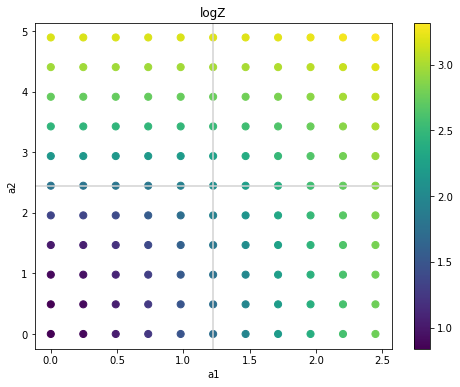

saved to ./data_output/AKLT2D_X10_scan_grid/AKLT2D_X10_scan_grid_logZ.png


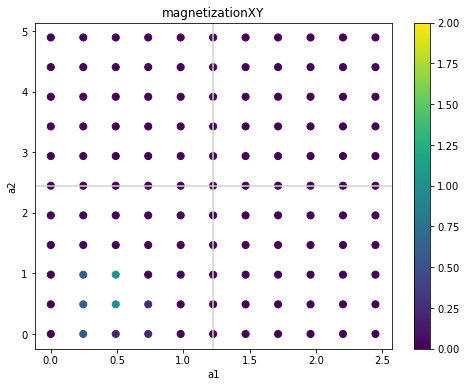

saved to ./data_output/AKLT2D_X10_scan_grid/AKLT2D_X10_scan_grid_magnetizationXY.png


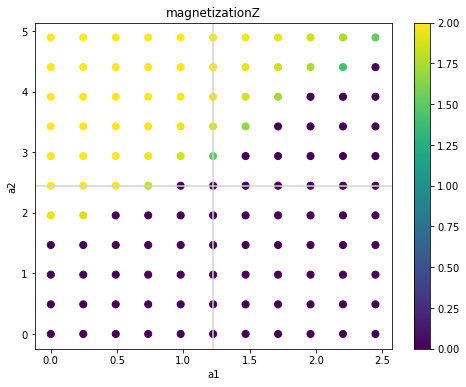

saved to ./data_output/AKLT2D_X10_scan_grid/AKLT2D_X10_scan_grid_magnetizationZ.png


In [57]:
# %matplotlib widget
%matplotlib inline

def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    dfs=[]
    for filename in tqdm(filenames):
        df=pd.read_csv(filename)
        dfs.append(df)
        # print(filename)
    print('loaded {} files'.format(len(dfs)))
    df=pd.concat(dfs)
    df['magnetizationXY']=(df['magnetizationX']**2+df['magnetizationY']**2)**.5
    df['magnetizationXYZ']=(df['magnetizationX']**2+df['magnetizationY']**2+df['magnetizationZ']**2)**.5
    return df
def grid_plot_2D(df,obs_name,clim=None,filename=None):
    fig=plt.figure(figsize=(8,6))
    plt.axhline(critical_params['a2'],c='lightgrey')
    plt.axvline(critical_params['a1'],c='lightgrey')
    plt.scatter(df['a1'],df['a2'],c=df[obs_name],s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    plt.xlabel('a1');plt.ylabel('a2');plt.title(obs_name)
    plt.colorbar()
    plt.show()
    if filename:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')
def grid_plot_3D(df,obs_name,clim=None,filename=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    # draw a 3d cross at critical point
    p=ax.scatter(df['a1'],df['a2'],df['a3'],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel('a1');ax.set_ylabel('a2');ax.set_zlabel('a3');ax.set_title(obs_name)
    fig.colorbar(p)
    plt.show()
    if filename:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')
def section_plot(df,obs_name,slice_param_name,slice_value,clim=None,filename=None):
    df=df[np.isclose(df[slice_param_name],slice_value)]
    other_param_names=[x for x in ['a1','a2','a3'] if x!=slice_param_name]
    # plt.scatter(df[other_param_names[0]],df[other_param_names[1]],c=df[obs_name],
    #             cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    # plt.xlabel(other_param_names[0])
    # plt.ylabel(other_param_names[1])
    # plt.title("{obs_name} {slice_param_name}={slice_value}".format(obs_name=obs_name,slice_param_name=slice_param_name,slice_value=slice_value))
    # 3d plot
    fig = plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(df[other_param_names[0]],df[other_param_names[1]],df[obs_name],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel(other_param_names[0]);ax.set_ylabel(other_param_names[1]);ax.set_zlabel(obs_name)
    ax.set_title("{obs_name} {slice_param_name}={slice_value}".format(obs_name=obs_name,slice_param_name=slice_param_name,slice_value=slice_value))
    plt.tight_layout()
    plt.show()
    if filename:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')

df_all=load_df(glob(f'./data/{task_name}/*/observables.csv'))
df=df_all[df_all['iLayer']==60]
os.makedirs(f'./data_output/{task_name}/',exist_ok=True)
df.to_csv(f'./data_output/{task_name}/{task_name}_observables.csv',index=False)
print(f'saved to ./data_output/{task_name}/{task_name}_observables.csv')

grid_plot=grid_plot_3D if len(critical_params)==3 else grid_plot_2D

grid_plot(df,'logZ',filename=f'./data_output/{task_name}/{task_name}_logZ.png')
grid_plot(df,'magnetizationXY',clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationXY.png')
grid_plot(df,'magnetizationZ',clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationZ.png')

if len(critical_params)==3:
    section_plot(df,'logZ','a1',np.sqrt(20/15),filename=f'./data_output/{task_name}/{task_name}_logZ_a1.png')
    section_plot(df,'magnetizationXY','a1',np.sqrt(20/15),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationXY_a1.png')
    section_plot(df,'magnetizationZ','a1',np.sqrt(20/15),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationZ_a1.png')

    section_plot(df,'logZ','a2',np.sqrt(20/6),filename=f'./data_output/{task_name}/{task_name}_logZ_a2.png')
    section_plot(df,'magnetizationXY','a2',np.sqrt(20/6),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationXY_a2.png')
    section_plot(df,'magnetizationZ','a2',np.sqrt(20/6),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationZ_a2.png')

    section_plot(df,'logZ','a3',np.sqrt(20/1),filename=f'./data_output/{task_name}/{task_name}_logZ_a3.png')
    section_plot(df,'magnetizationXY','a3',np.sqrt(20/1),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationXY_a3.png')
    section_plot(df,'magnetizationZ','a3',np.sqrt(20/1),clim=ylim,filename=f'./data_output/{task_name}/{task_name}_magnetizationZ_a3.png')